# Iris Flower Classification Project
## Project Overview
This project focuses on building a machine learning model to classify Iris flowers into one of three species:

Iris-setosa.
Iris-versicolor.
Iris-virginica.

The classification is based on four key features of the flower:

Sepal Length (in cm)
Sepal Width (in cm)
Petal Length (in cm)
Petal Width (in cm)

## Key Objectives:
~Perform exploratory data analysis (EDA) to gain insights into feature relationships and distributions.

~Preprocess the data, including encoding categorical labels and standardizing numerical features.

~Train and compare multiple classification algorithms to determine the best-performing model.

~Deploy the model using Streamlit, creating an interactive interface for real-time predictions.

## Steps in the Workflow
~Data Ingestion:
Load the Iris dataset and validate its structure.

~Exploratory Data Analysis (EDA):
Visualize feature distributions and correlations to understand the dataset.

~Preprocessing:
Encode the species column into numeric labels (0, 1, 2).
Scale the input features for consistent model performance.

~Model Development:
Train and evaluate multiple machine learning models (Logistic Regression, KNN, Decision Tree, Random Forest, SVM).
Select the best model based on accuracy and classification metrics.

~Deployment:
Deploy the final model using a Streamlit app for user interaction and predictions.


## Import the Libraries

In [25]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib


## Load the Dataset

In [ ]:
file_path = "C:\\Users\\anura\\Desktop\\Project 3- Iris classification\\Data\\Iris.csv" 
data = pd.read_csv(file_path)

# Validate Data
print("First 5 Rows:\n", data.head())
print("\nData Information:\n")
data.info()
print("\nMissing Values:\n", data.isnull().sum())
print("\nDuplicate Rows:", data.duplicated().sum())


First 5 Rows:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Missing Values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLe

In [27]:
print("Column Names in Dataset:", data.columns)


Column Names in Dataset: Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


# Drop Duplicates

In [ ]:
data = data.drop_duplicates()

# Feature-Target Split

In [ ]:
X = data.drop("Species", axis=1)
y = data["Species"]

# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-Hot Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

data["Species_encoded"] = label_encoder.fit_transform(data["Species"])

# Verify the transformation
print("Encoded Species Column:")
print(data[["Species", "Species_encoded"]].head())

# Use numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Encoded Species Column:
       Species  Species_encoded
0  Iris-setosa                0
1  Iris-setosa                0
2  Iris-setosa                0
3  Iris-setosa                0
4  Iris-setosa                0

Correlation Matrix:
                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm         1.000000     -0.109321       0.871305      0.817058   
SepalWidthCm         -0.109321      1.000000      -0.421057     -0.356376   
PetalLengthCm         0.871305     -0.421057       1.000000      0.961883   
PetalWidthCm          0.817058     -0.356376       0.961883      1.000000   
Species_encoded       0.782904     -0.418348       0.948339      0.955693   

                 Species_encoded  
SepalLengthCm           0.782904  
SepalWidthCm           -0.418348  
PetalLengthCm           0.948339  
PetalWidthCm            0.955693  
Species_encoded         1.000000  


# Correlation matrix and heatmap

Data Types:
 SepalLengthCm      float64
SepalWidthCm       float64
PetalLengthCm      float64
PetalWidthCm       float64
Species             object
Species_encoded      int64
dtype: object


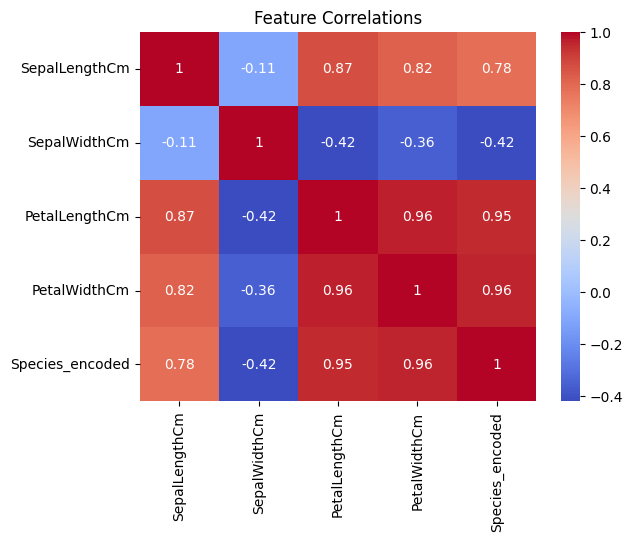

In [ ]:
print("Data Types:\n", data.dtypes)

# Filter numeric columns
numeric_data = data.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()


# Model training and Selection

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Train and Evaluate Models
best_model = None
best_accuracy = 0

for name, model in models.items():
    # Train Model
    model.fit(X_train_scaled, y_train)
    # Predict
    predictions = model.predict(X_test_scaled)
    # Evaluate
    acc = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {acc}")
    print(classification_report(y_test, predictions))
    print("\n")
    
    # Track Best Model
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

print(f"Best Model: {best_model}")
print(f"Best Accuracy: {best_accuracy}")


Logistic Regression Accuracy: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



KNN Accuracy: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



Decision Tree Accuracy: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-

# Model Packaging and Saving

In [ ]:

joblib.dump(best_model, "iris_model.pkl")
joblib.dump(scaler, "iris_scaler.pkl")

print("Model and Scaler Saved as iris_model.pkl and iris_scaler.pkl!")


Model and Scaler Saved as iris_model.pkl and iris_scaler.pkl!


# Model Loading and Predictions

In [ ]:
loaded_model = joblib.load("iris_model.pkl")
loaded_scaler = joblib.load("iris_scaler.pkl")

# Test the Loaded Model
sample_input = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example input
sample_scaled = loaded_scaler.transform(sample_input)
prediction = loaded_model.predict(sample_scaled)

print(f"Predicted Species: {prediction[0]}")


Predicted Species: Iris-versicolor
